# Projeto 2 - FIFA 19 Rating Prediction

Thiago Lopes David

Thiago Maitan Pegorer

## Introdução


* O que eh o fifa 2019?

O FIFA 2019 é o jogo eletronico de futebol mais famoso nos dias de hoje. Desenvolvido pela EA Sports e publicado no fim de 2018, esse jogo oferece diversos modos de jogos para seu usuario, de modo a tornar a experiencia cada vez mais realista. Para que isso seja possivel, a EA Sports se preocupa bastante com a producao dos jogadores do jogo, dando Ratings a cada um deles de acordo com suas qualidades na vida real. Esses ratings sao a media de cada atributo dado ao jogador especifico, e quanto maior essa media, melhor se torna o jogador no jogo.

* Qual o objetivo do projeto?

Nesse projeto, seré estudado se eé possivel prever os Ratings dos jogadores para os proximos anos, baseado em Ratings passados. Para isso, sera analisado uma planilha que contem os bancos de dados de todos o jogadores do Fifa 19, ou seja, todos os atributos dados, a cada jogador.

## Minerando dados e Características do Dataset

* Importando bibliotecas

In [36]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pickle

* Lendo dataset

In [37]:
# Listando o diretório de trabalho. Lembre-se que o arquivo com a base de dados precisa estar neste diretório.
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/thiagopegorer/Documents/Insper/3 semestre/Ciencia dos Dados/FIFA_Rating_P2


In [38]:
fifa = pd.read_csv("data.csv")

In [39]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [40]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [41]:
fifa_df=fifa[["Name","Age",'Nationality','Overall', 'Potential','Club', 'Wage','Preferred Foot','Position','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
fifa_df.head()

,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,Position,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€565K,Left,RF,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€405K,Right,ST,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€290K,Right,LW,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€260K,Right,GK,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€355K,Right,RCM,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [42]:
fifa_df.loc[:,"Wage"]=pd.to_numeric(fifa_df["Wage"].str.slice(start=1,stop= -1))*1000
fifa_df.head()

,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,Position,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,565000.0,Left,RF,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,405000.0,Right,ST,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,290000.0,Right,LW,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,260000.0,Right,GK,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,355000.0,Right,RCM,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


### Análise exploratória inicial

<Figure size 432x288 with 0 Axes>

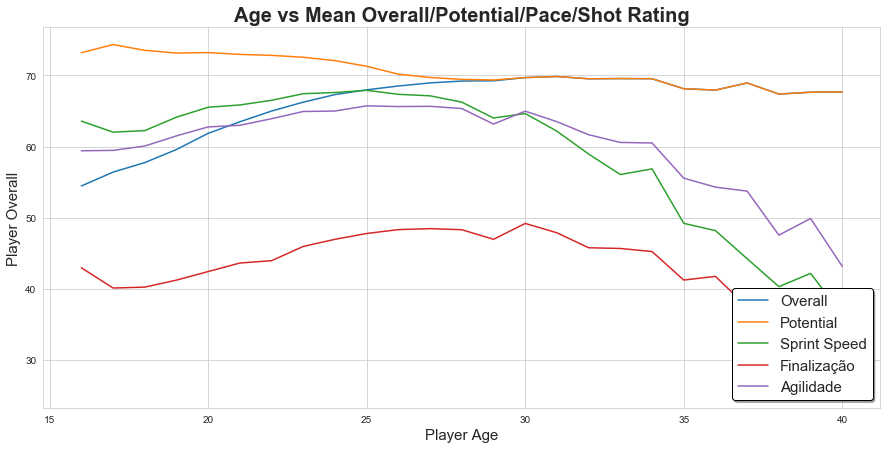

In [43]:
dataset40 = fifa_df.loc[fifa_df['Age'] <= 40]
idade = dataset40.sort_values("Age")['Age'].unique()
overall = dataset40.groupby("Age")["Overall"].mean().values
potential = dataset40.groupby("Age")["Potential"].mean().values
Sprint_Speed = dataset40.groupby("Age")["SprintSpeed"].mean().values
Finalização = dataset40.groupby("Age")["Finishing"].mean().values
Agilidade = dataset40.groupby("Age")["Agility"].mean().values

plt.figure()
plt.figure(figsize=(15,7))
plt.title('Age vs Mean Overall/Potential/Pace/Shot Rating', fontsize=20, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Overall', fontsize=15)
sns.set_style("whitegrid")
plt.plot(idade, overall, label="Overall")
plt.plot(idade, potential, label="Potential")
plt.plot(idade,Sprint_Speed, label="Sprint Speed")
plt.plot(idade,Finalização, label="Finalização")
plt.plot(idade,Agilidade, label="Agilidade")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.savefig('chart.png')

Esse gráfico mostra a relação entre a idade do jogador com algumas habilidades escolhidas, assim como, overall, pontencial, sprint speed, finalizacao e agilidade. Para realizar esses dados, foi tirado uma média ponderada de cada habilidade para valores de jogadores com a mesma idade, tornando essa analise de habilidades, uma média de todos os jogadores do jogo. 

Como esperado, pode-se analisar que, com o passar dos anos, o overall dos jogadores vão aumentando e se aproximando cada vez mais à curva do potencial, dando uma estabilizada a partir dos 30 anos, idade em que os jogadores, em média, param de evoluir.

Também, é possível concluir que tanto a agilidade quanto a velocidade dos jogadores diminuem conforme aumenta a idade dos jogadores. Já para a finalizacao, a curva apresenta, um crescimento leve e depois tende a retornar ao valor medio inicial.

Para todas as habilidades escolhidas,a media tende a diminuir a partir dos 30 anos, o que mostra até quando os jogadores são esperados para manter seu overall o mais alto possível.

In [45]:
import plotly.graph_objects as go
categories = ['Pace','Finalização','Passe', 'Drible','Defesa','Fisico']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[90,93,81, 90, 35,89],
      theta=categories,
      fill='toself',
      name='Cristiano Ronaldo'
))
fig.add_trace(go.Scatterpolar(
      r=[88,91,88, 96,32,61],
      theta=categories,
      fill='toself',
      name='Messi'
))

fig.add_trace(go.Scatterpolar(
      r=[86, 80, 72, 86, 39,73],
      theta=categories,
      fill='toself',
      name='Gabriel Jesus'
))

fig.add_trace(go.Scatterpolar(
      r=[77, 86, 92, 87, 60,78],
      theta=categories,
      fill='toself',
      name='Kevin De Bruyne'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=False
)

fig.show()

## Modelo de Predição

## Processo e estatistica de validação

## Conclusão

## Referências Bibliográficas

https://www.futhead.com/players/230666/

https://plotly.com/python/radar-chart/

https://www.kaggle.com/vibhavagarwal5/fifa-overall-positional-rating-prediction/comments